$$
\begin{cases}
\frac{d y}{d t} = - 2 y\\
y(0) = 1
\end{cases}
$$
solve:
$$
y(t) = e^{-2t}
$$

(0, 5)
10000 10000
t [0.00000000e+00 5.00050005e-04 1.00010001e-03 ... 4.99899990e+00
 4.99949995e+00 5.00000000e+00]
y [1.         1.00154981 1.00309892 ... 4.40578852 4.40580591 4.40582329]


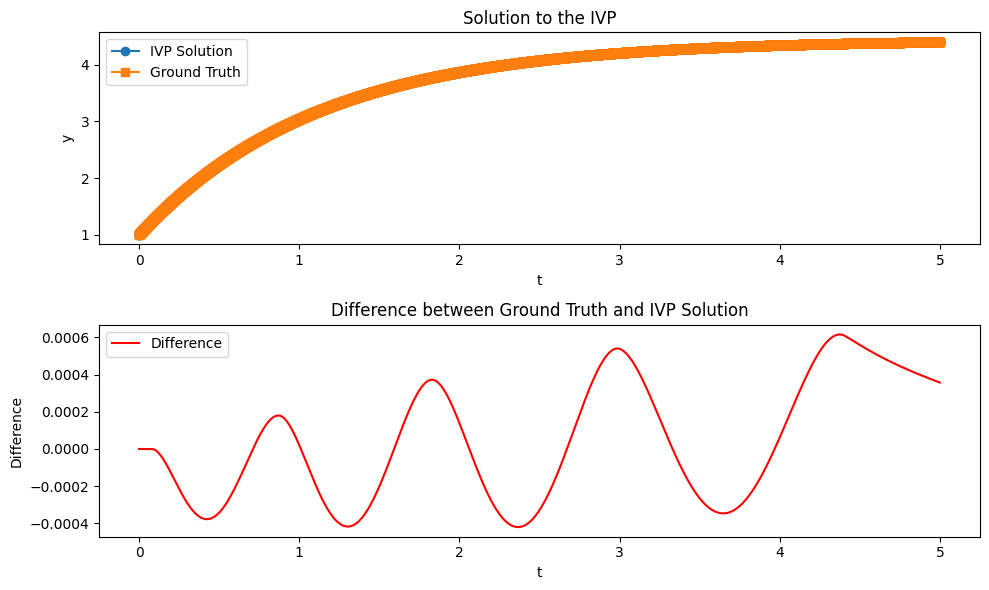

In [4]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the differential equation
def dydt(t, y):
    return -0.9 * y + 4

# for a dy/dt = ay+b we have a ground truth y = (y0+b/a)e^at - b/a
def ground_truth(a,b,y0,t):
    return (y0+b/a)*np.exp(a*t) - b/a

# Initial condition
y0 = 1

# Time span
t_span = (0, 5)
t_eval = np.linspace(0, 5, 10000)
print(t_span)

# ground truth
tru_y = ground_truth(-0.9,4,y0,t_eval)

# Solve the IVP
sol = solve_ivp(dydt, t_span, [y0], t_eval=t_eval)
print(len(sol.t), len(sol.y[0]))
print('t', sol.t)
print('y', sol.y[0])

# Plot the solution
plt.figure(figsize=(10, 6))

# First subplot for the solution
plt.subplot(2, 1, 1)
plt.plot(sol.t, sol.y[0], label='IVP Solution', marker='o')
plt.plot(sol.t, tru_y, label='Ground Truth', marker='s')
plt.xlabel('t')
plt.ylabel('y')
plt.title('Solution to the IVP')
plt.legend()

# Second subplot for the difference
plt.subplot(2, 1, 2)
plt.plot(sol.t, tru_y - sol.y[0], label='Difference', color='red')
plt.xlabel('t')
plt.ylabel('Difference')
plt.title('Difference between Ground Truth and IVP Solution')
plt.legend()

plt.tight_layout()
plt.show()